## To predict the right class of the data provided to the classifier


### Prediction using Decision Tree Algorithm


#### Importing dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [10]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Checking for null value

In [12]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
df.shape

(150, 6)

In [14]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Corelation matrix

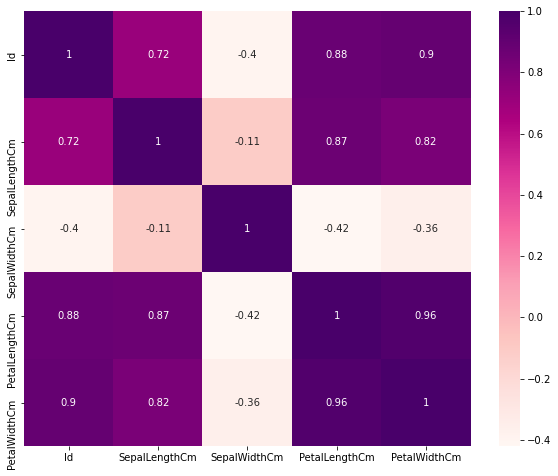

In [15]:
plt.figure(figsize=(10,8))
df.corr()
sns.heatmap(df.corr(), annot=True, cmap='RdPu')

#### the above visualization implies that, if we take Petal length and width, these two variables are highly correlated where as sepal length and width are not correlated to each oher.

### Training and Testing

In [16]:
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)


(105, 6)
(45, 6)


In [19]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y_train=train.Species
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values 
y_test =test.Species


In [20]:
X_train[1:5]

array([[7.7, 3. , 6.1, 2.3],
       [6.5, 3.2, 5.1, 2. ],
       [6.1, 3. , 4.6, 1.4],
       [6.6, 2.9, 4.6, 1.3]])

In [21]:
y_train.head()

16         Iris-setosa
135     Iris-virginica
110     Iris-virginica
91     Iris-versicolor
58     Iris-versicolor
Name: Species, dtype: object

### Accuracy of decision tree

In [22]:
from sklearn import metrics
model=DecisionTreeClassifier(criterion='gini',random_state=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9333333333333333


In [23]:
print("Confusion Matrix:",confusion_matrix(y_test,prediction))

Confusion Matrix: [[ 9  0  0]
 [ 0 19  3]
 [ 0  0 14]]


### Decision tree


In [27]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [28]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


In [29]:
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



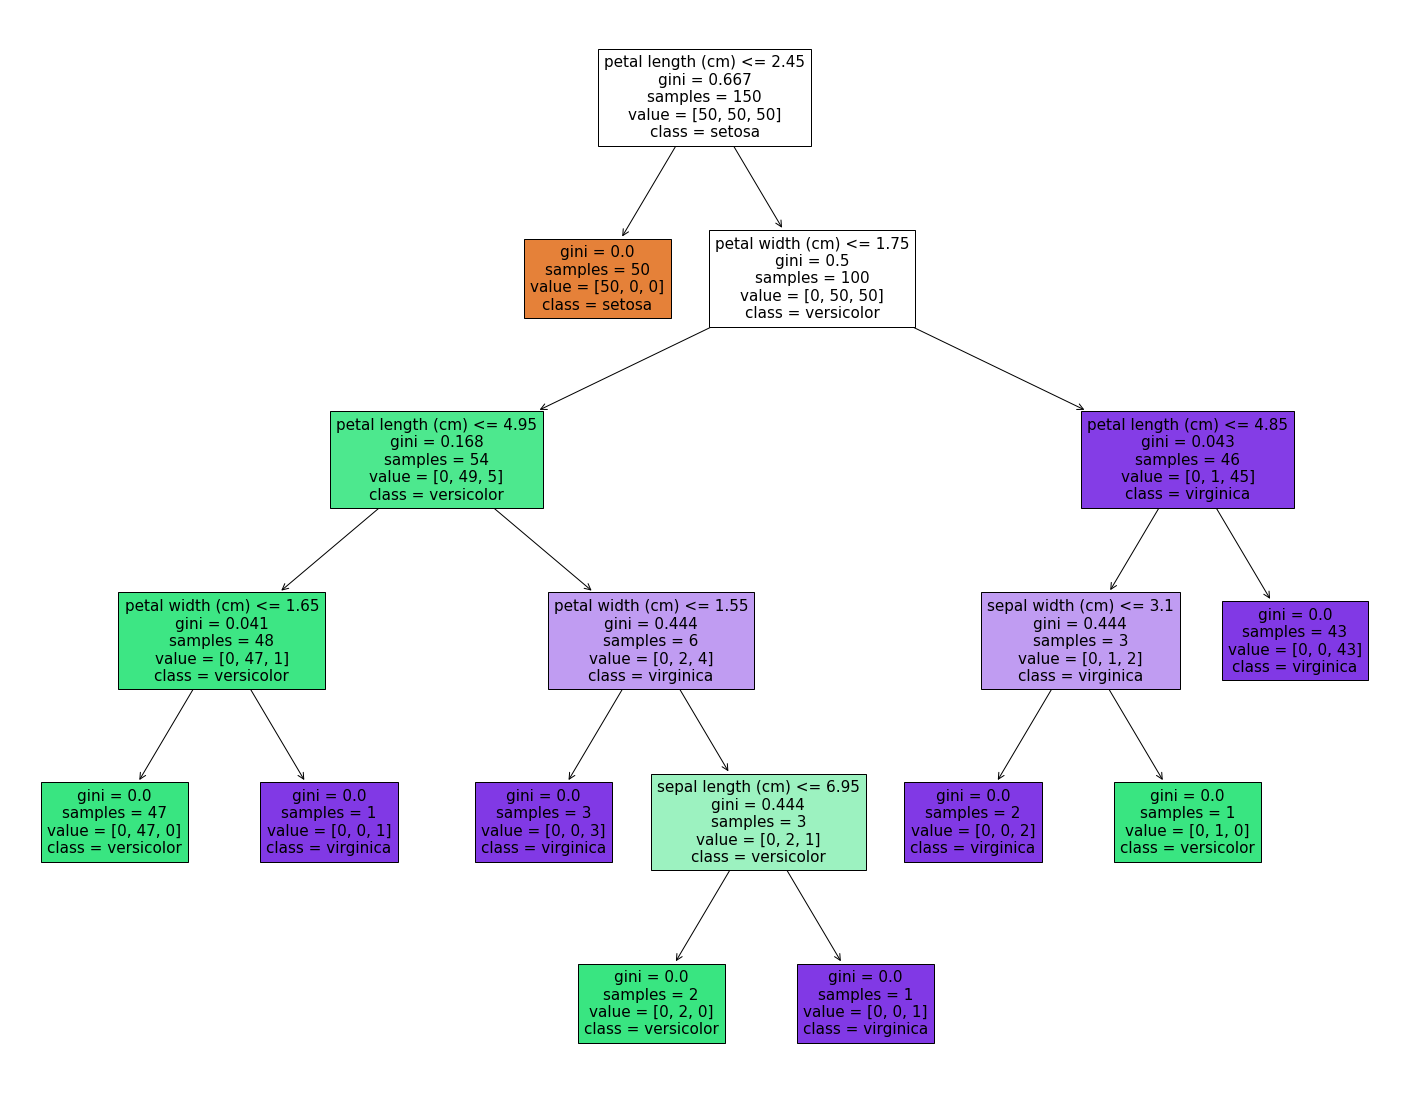

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)